In [685]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.metrics import f1_score,jaccard_score,classification_report
import seaborn as sns

In [686]:
df=pd.read_csv('P2.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [687]:
df.shape

(303, 14)

In [688]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [689]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [690]:
df['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

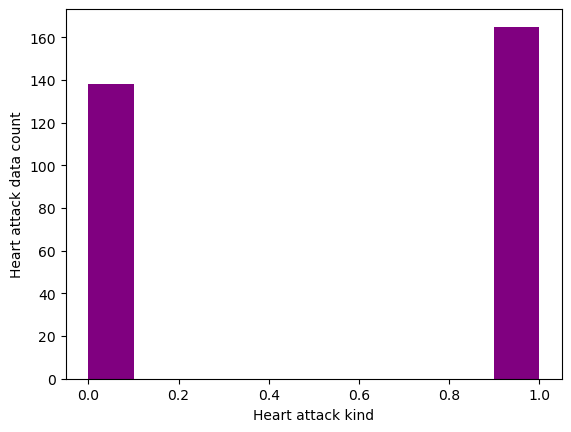

In [691]:
plt.hist(df['output'],color='purple')
plt.xlabel('Heart attack kind')
plt.ylabel('Heart attack data count')
plt.show()

In [692]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [693]:
corr_matrix = df.corr()
columns_to_drop = []
for column in corr_matrix.columns:
    if abs(corr_matrix['output'][column]) < 0.10:
        columns_to_drop.append(column)
df = df.drop(columns_to_drop, axis=1)
df

,age,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,0,150,0,2.3,0,0,1,1
1,37,1,2,130,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,172,0,1.4,2,0,2,1
3,56,1,1,120,1,178,0,0.8,2,0,2,1
4,57,0,0,120,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,1,123,1,0.2,1,0,3,0
299,45,1,3,110,1,132,0,1.2,1,0,3,0
300,68,1,0,144,1,141,0,3.4,1,2,3,0
301,57,1,0,130,1,115,1,1.2,1,1,3,0


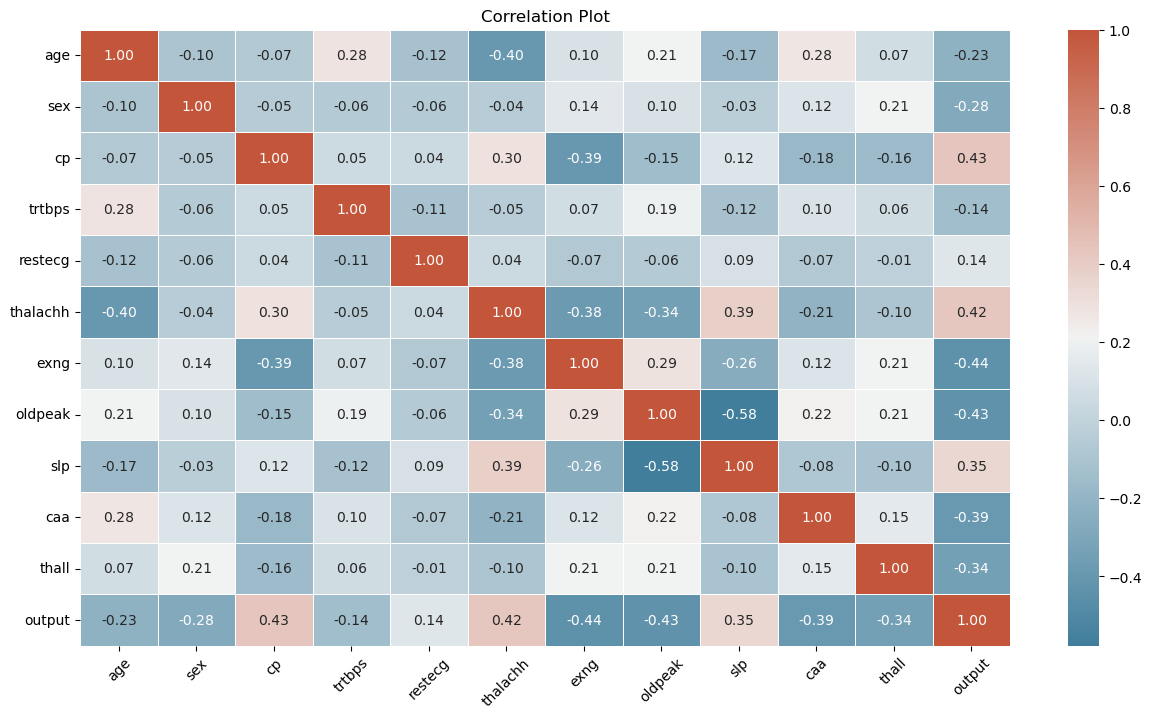

In [694]:

corr = df.corr()

fig, ax = plt.subplots(figsize=(15, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5, ax=ax)

plt.title("Correlation Plot")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

## Finishing the checking process

## KNN methoud

In [695]:
best_prediction=[0]
best_methoud=['']

In [696]:
x=df.drop('output',axis=1)
x[:5]

,age,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,0,150,0,2.3,0,0,1
1,37,1,2,130,1,187,0,3.5,0,0,2
2,41,0,1,130,0,172,0,1.4,2,0,2
3,56,1,1,120,1,178,0,0.8,2,0,2
4,57,0,0,120,1,163,1,0.6,2,0,2


In [697]:
y=df['output']
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [698]:
X = preprocessing.StandardScaler()
x=X.fit(x).transform(x.astype(float))
x[:5]

array([[ 0.95,  0.68,  1.97,  0.76, -1.01,  0.02, -0.7 ,  1.09, -2.27,
        -0.71, -2.15],
       [-1.92,  0.68,  1.  , -0.09,  0.9 ,  1.63, -0.7 ,  2.12, -2.27,
        -0.71, -0.51],
       [-1.47, -1.47,  0.03, -0.09, -1.01,  0.98, -0.7 ,  0.31,  0.98,
        -0.71, -0.51],
       [ 0.18,  0.68,  0.03, -0.66,  0.9 ,  1.24, -0.7 , -0.21,  0.98,
        -0.71, -0.51],
       [ 0.29, -1.47, -0.94, -0.66,  0.9 ,  0.58,  1.44, -0.38,  0.98,
        -0.71, -0.51]])

In [699]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 11) (242,)
Test set: (61, 11) (61,)


In [700]:
from sklearn.neighbors import KNeighborsClassifier


In [701]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = f1_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

c:\Users\Ali\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Ali\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

array([0.84, 0.77, 0.87, 0.85, 0.89, 0.87, 0.87, 0.87, 0.89])

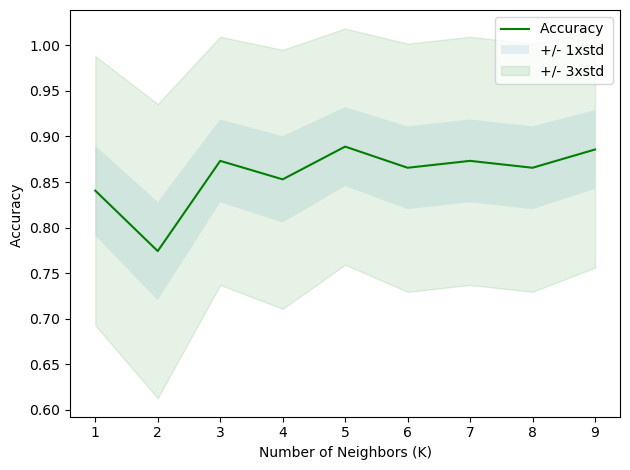

In [702]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [703]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.8888888888888888 with k= 5


In [704]:
def find(score,methoud):
    if score > best_prediction[0]:
        best_prediction[0]=score
        best_methoud[0]=methoud

In [705]:
find(mean_acc.max(),'KNN')

In [706]:
k=5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat=neigh.predict(X_test)


target_names = ['Heart attack 0', 'Heart attack 1']
report = classification_report(y_test, yhat, target_names=target_names)
print(report)


                precision    recall  f1-score   support

Heart attack 0       0.84      0.84      0.84        25
Heart attack 1       0.89      0.89      0.89        36

      accuracy                           0.87        61
     macro avg       0.86      0.86      0.86        61
  weighted avg       0.87      0.87      0.87        61



c:\Users\Ali\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [707]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[32  4]
 [ 4 21]]


Confusion matrix, without normalization
[[32  4]
 [ 4 21]]


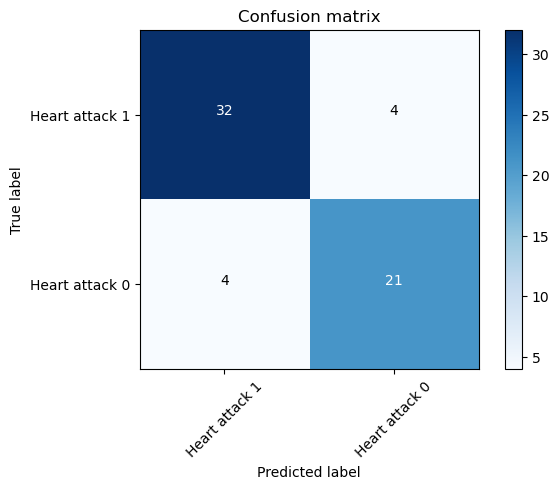

In [708]:

cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)



plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Heart attack 1','Heart attack 0'],normalize= False,  title='Confusion matrix')

## Decision tree methoud

In [709]:
from sklearn.tree import DecisionTreeClassifier

scores=[]
methoud=[]
for i in ['gini', 'entropy']:
    drugTree = DecisionTreeClassifier(criterion=i, max_depth = 4)
    drugTree.fit(X_train,y_train)
    yhat = drugTree.predict(X_test)
    scores.append(f1_score(y_test, yhat))
print(scores)
print("DecisionTrees's Accuracy: ",max(scores))
find(mean_acc.max(),'Decision Tree')

[0.8799999999999999, 0.8799999999999999]
DecisionTrees's Accuracy:  0.8799999999999999


In [710]:
target_names = ['Heart attack 0', 'Heart attack 1']
report = classification_report(y_test, yhat, target_names=target_names)
print(report)

                precision    recall  f1-score   support

Heart attack 0       0.86      0.76      0.81        25
Heart attack 1       0.85      0.92      0.88        36

      accuracy                           0.85        61
     macro avg       0.85      0.84      0.84        61
  weighted avg       0.85      0.85      0.85        61



In [711]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[33  3]
 [ 6 19]]


Confusion matrix, without normalization
[[33  3]
 [ 6 19]]


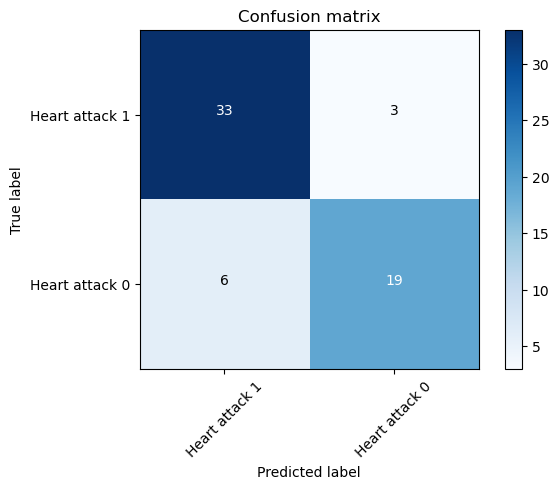

In [712]:

cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)



plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Heart attack 1','Heart attack 0'],normalize= False,  title='Confusion matrix')

## Logestic regression

In [713]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.19, solver='lbfgs')
LR.fit(X_train,y_train)
yhat = LR.predict(X_test)
print(y_test[:5])
print(yhat[:5])



113    1
249    0
18     1
142    1
299    0
Name: output, dtype: int64
[1 0 1 1 1]


In [731]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.28, 0.72],
       [0.92, 0.08],
       [0.41, 0.59],
       [0.03, 0.97],
       [0.21, 0.79],
       [0.58, 0.42],
       [0.79, 0.21],
       [0.08, 0.92],
       [0.37, 0.63],
       [0.22, 0.78],
       [0.33, 0.67],
       [0.04, 0.96],
       [0.24, 0.76],
       [0.68, 0.32],
       [0.17, 0.83],
       [0.99, 0.01],
       [0.13, 0.87],
       [0.11, 0.89],
       [0.86, 0.14],
       [0.43, 0.57],
       [0.09, 0.91],
       [0.32, 0.68],
       [0.97, 0.03],
       [0.41, 0.59],
       [0.35, 0.65],
       [0.94, 0.06],
       [0.6 , 0.4 ],
       [0.04, 0.96],
       [0.46, 0.54],
       [0.98, 0.02],
       [0.73, 0.27],
       [0.47, 0.53],
       [0.02, 0.98],
       [0.19, 0.81],
       [0.34, 0.66],
       [0.06, 0.94],
       [0.09, 0.91],
       [0.27, 0.73],
       [0.48, 0.52],
       [0.99, 0.01],
       [0.97, 0.03],
       [0.86, 0.14],
       [0.91, 0.09],
       [0.24, 0.76],
       [0.1 , 0.9 ],
       [0.25, 0.75],
       [0.94, 0.06],
       [0.61,

In [715]:
jaccard_score(y_test, yhat)

0.85

In [716]:

f1_score(y_test, yhat) 

0.918918918918919

In [717]:
find(f1_score(y_test, yhat),'Logestic Regression')

In [718]:
target_names = ['Heart attack 0', 'Heart attack 1']
report = classification_report(y_test, yhat, target_names=target_names)
print(report)

                precision    recall  f1-score   support

Heart attack 0       0.91      0.84      0.87        25
Heart attack 1       0.89      0.94      0.92        36

      accuracy                           0.90        61
     macro avg       0.90      0.89      0.90        61
  weighted avg       0.90      0.90      0.90        61



In [719]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34  2]
 [ 4 21]]


Confusion matrix, without normalization
[[34  2]
 [ 4 21]]


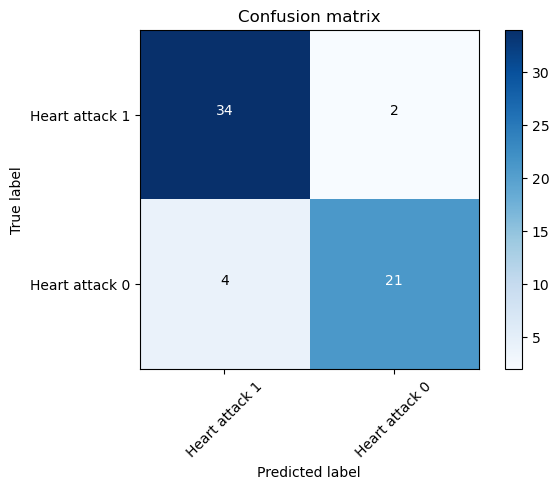

In [720]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Heart attack 1','Heart attack 0'],normalize= False,  title='Confusion matrix')

## SVM methoud

In [721]:
from sklearn import svm

clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
print(y_test[:5])
print(yhat[:5])



113    1
249    0
18     1
142    1
299    0
Name: output, dtype: int64
[1 0 0 1 1]


In [722]:
jaccard_score(y_test, yhat)

0.8

In [723]:
f1_score(y_test, yhat) 

0.8888888888888888

In [724]:
find(f1_score(y_test, yhat),'SVM')

In [725]:
target_names = ['Heart attack 0', 'Heart attack 1']
report = classification_report(y_test, yhat, target_names=target_names)
print(report)

                precision    recall  f1-score   support

Heart attack 0       0.84      0.84      0.84        25
Heart attack 1       0.89      0.89      0.89        36

      accuracy                           0.87        61
     macro avg       0.86      0.86      0.86        61
  weighted avg       0.87      0.87      0.87        61



In [726]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[32  4]
 [ 4 21]]


Confusion matrix, without normalization
[[32  4]
 [ 4 21]]


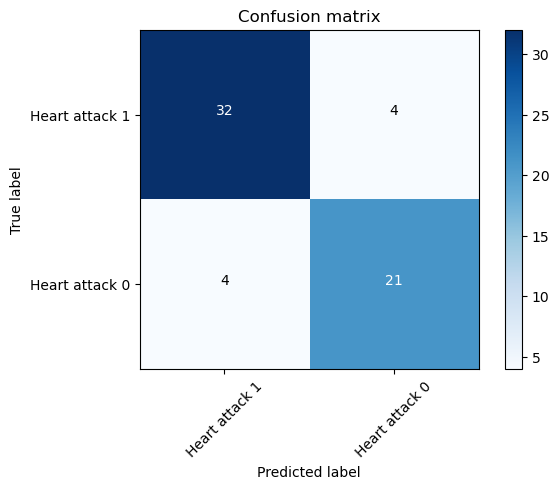

In [727]:

cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)



plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Heart attack 1','Heart attack 0'],normalize= False,  title='Confusion matrix')

## Conclusion

In [728]:
print('Among all methoud,the best methoud to peredict is ',best_methoud[0])
print('And the best perediction score is ',best_prediction[0])

Among all methoud,the best methoud to peredict is  Logestic Regression
And the best perediction score is  0.918918918918919
